In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
tsa = pd.read_csv("twitter_sentiment_data.csv")
tsa.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [3]:
tsa.drop("sentiment", axis=1, inplace=True)
tsa.head()

,message,tweetid
0,@tiniebeany climate change is an interesting h...,792927353886371840
1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


### LENGTH OF TWEET

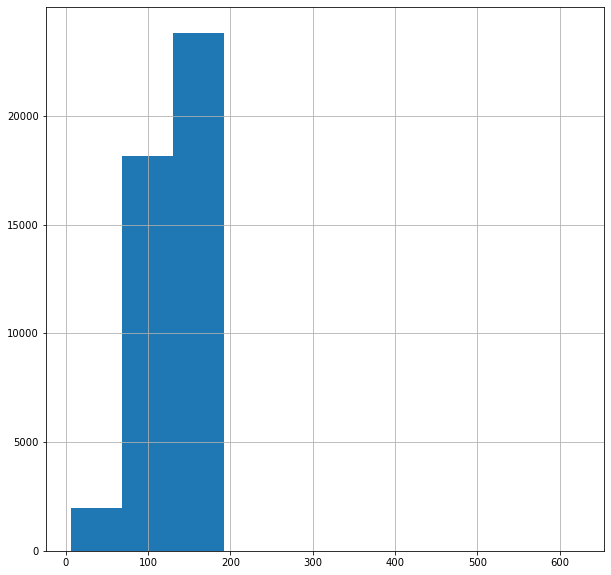

In [4]:
fig = plt.figure(figsize=(10, 10))
tsa['message'].str.len().hist()
fig.savefig("hist-length-of-tweet.png", bbox_inches = 'tight')

### NUMBER OF WORDS IN A TWEET

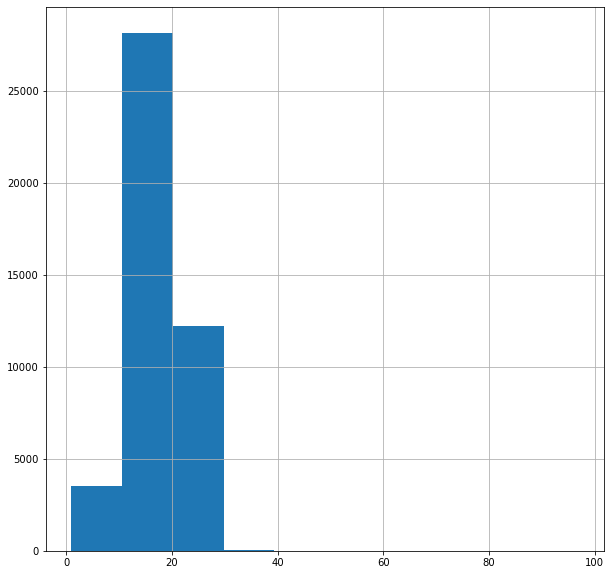

In [5]:
fig = plt.figure(figsize=(10, 10))
tsa['message'].str.split().map(lambda x : len(x)).hist()
fig.savefig("hist-no-words-of-tweet.png", bbox_inches = 'tight')

### AVERAGE WORD LENGTH IN A TWEET

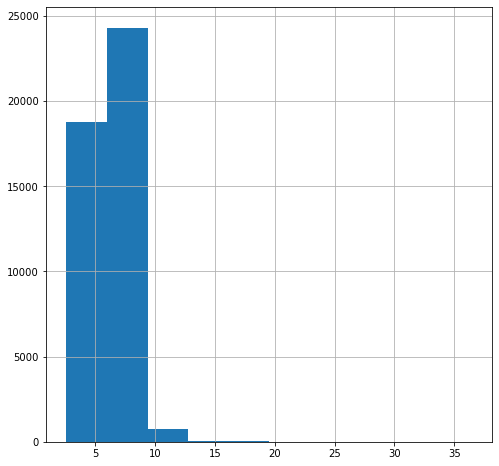

In [6]:
fig = plt.figure(figsize=(8, 8))
obj = tsa['message'].str.split().apply(lambda x : [len(i) for i in x])
obj = obj.map(lambda x : np.mean(x)) #map is only for pandas objects
obj.hist()
fig.savefig("hist-avg-wordlen-of-tweet.png", bbox_inches = 'tight')

### FREQUENCY OF THE STOP WORDS

In [7]:
# import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
# stop

In [8]:
corpus = []
twt = tsa['message'].str.split()
twt = twt.values.tolist()
corpus = [word for i in twt for word in i]
# corpus

In [9]:
from collections import defaultdict
dic = defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word] = dic[word] + 1
        
# dic

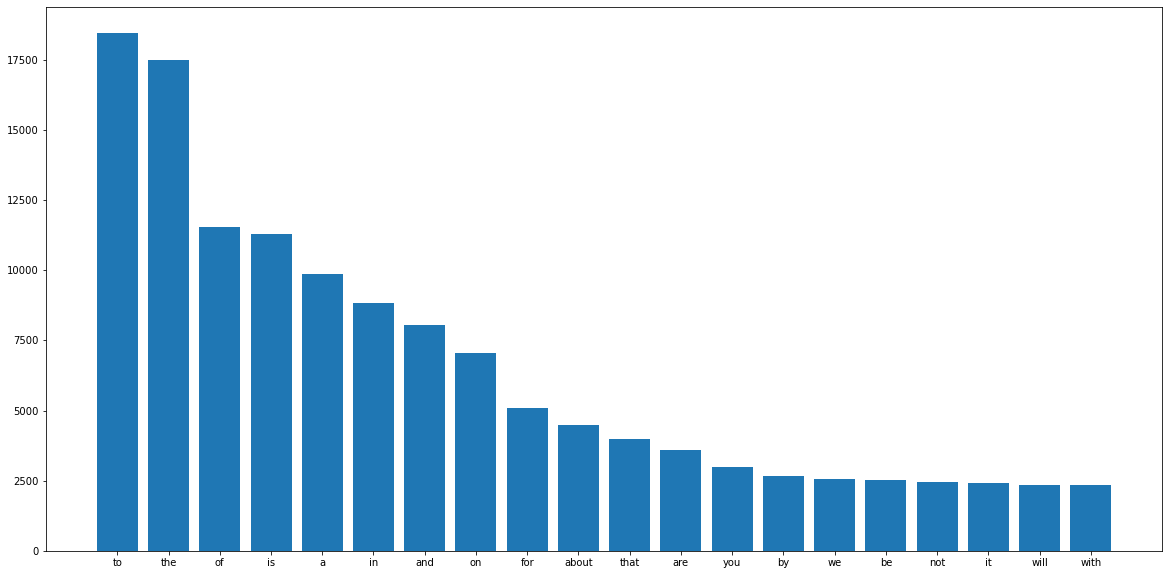

In [10]:
fig = plt.figure(figsize = (20, 10))
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
x,y = zip(*top)
plt.bar(x,y)
fig.savefig("top-stopwords-bar.png", bbox_inches="tight")

### FREQUENCY OF WORDS OTHER THAN STOPWORDS

In [11]:
import collections
from collections import Counter
import re

def username_filter(word):
    if(re.search("^@", word) == None and re.search("^((http|https)\:\/\/)", word) == None 
       and re.search("^&amp;$", word) == None and word != "RT" and word != "|" and word != "-"):
        return True
    else:
#         print(word)
        return False
    
filtered_corpus = filter(username_filter, corpus)
filtered_corpus = list(filtered_corpus)
# filtered_corpus

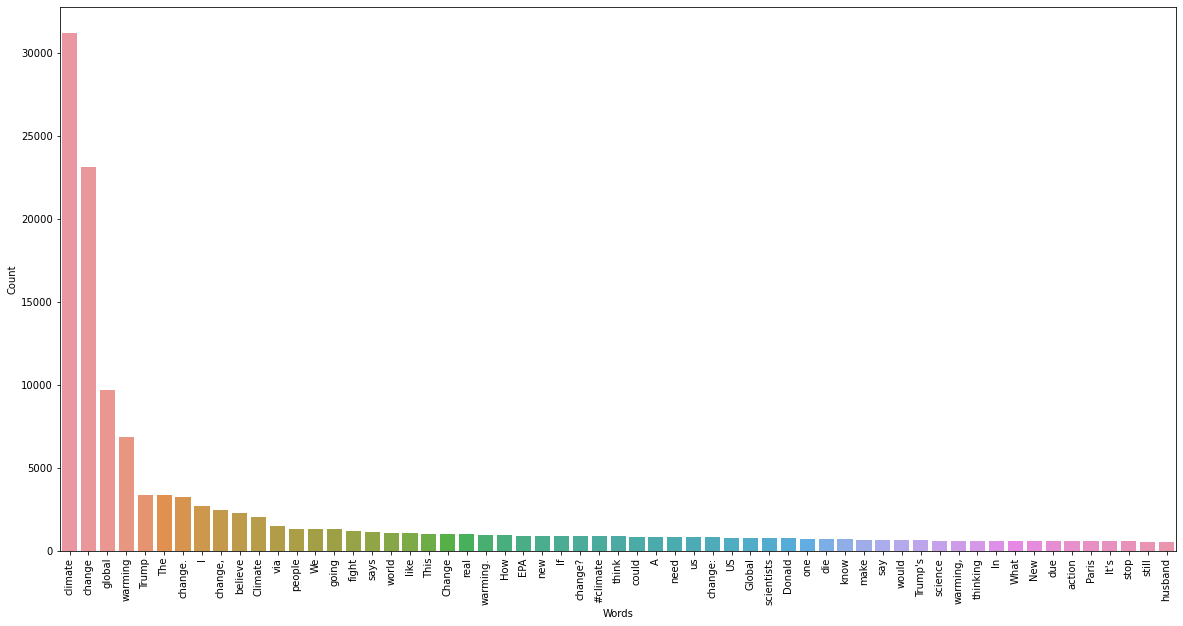

In [12]:
counter = Counter(filtered_corpus)
most = counter.most_common()
# most[:100]

# print(len(most))

x, y= [], []
for word,count in most[:125]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
# print(len(x)) 
fig = plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
plt.xlabel("Words")
plt.ylabel("Count")
sns.barplot(x = x, y = y)
fig.savefig("freq-words-barplot.png", bbox_inches = "tight")

### MOST FREQUENT N-GRAMS

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bow = vec.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:140]

In [14]:
vec = CountVectorizer(ngram_range = (2, 2)).fit(filtered_corpus)
bow = vec.transform(filtered_corpus)
sum_words = bow.sum(axis = 0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
# words_freq

[('climate change', 33866), ('https co', 26367), ('global warming', 10007), ('change https', 4956), ('on climate', 3282), ('change is', 3165), ('of climate', 2798), ('about climate', 1822), ('believe in', 1799), ('in climate', 1676), ('to climate', 1556), ('in the', 1501), ('change and', 1398), ('of the', 1392), ('http co', 1354), ('warming is', 1203), ('going to', 1179), ('warming https', 1104), ('the world', 1009), ('doesn believe', 987), ('is real', 938), ('of global', 937), ('and climate', 842), ('on the', 748), ('donald trump', 730), ('to the', 720), ('this is', 696), ('fight climate', 682), ('is the', 681), ('for climate', 628)]


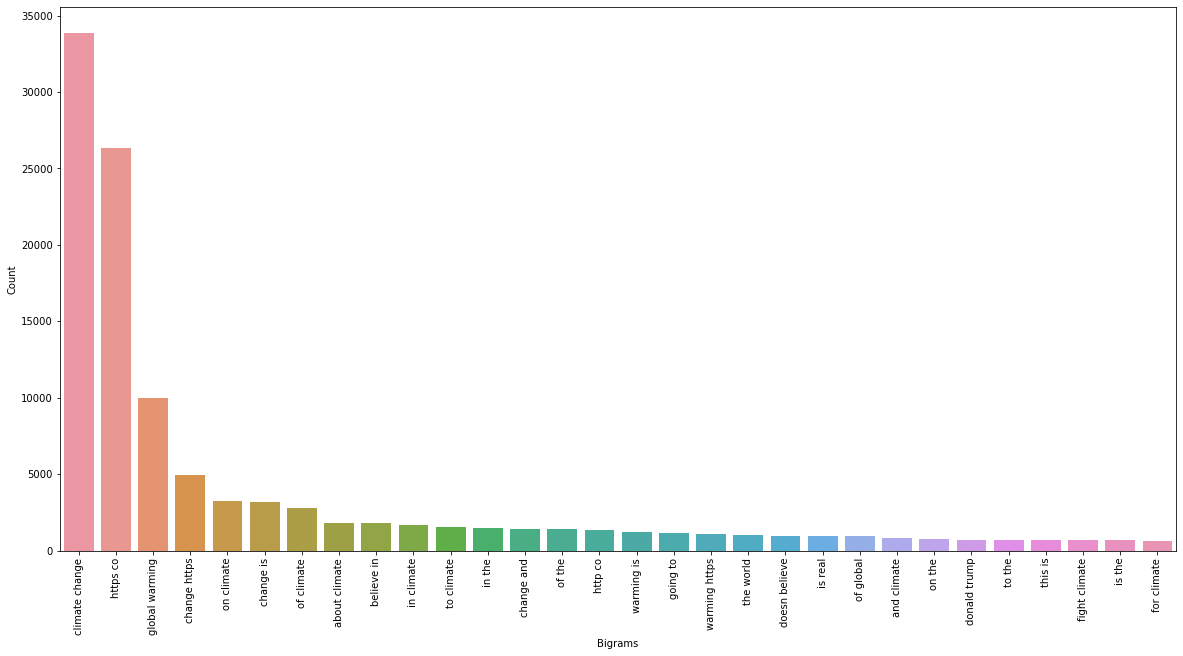

In [15]:
top_n_bigrams=get_top_ngram(tsa['message'],2)[:30]
print(top_n_bigrams)
x,y=map(list,zip(*top_n_bigrams)) 
fig = plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
plt.xlabel("Bigrams")
plt.ylabel("Count")
sns.barplot(x = x, y = y)
fig.savefig("freq-bigrams-barplot.png", bbox_inches = "tight")

[('climate change https', 4948), ('change https co', 4756), ('on climate change', 3236), ('climate change is', 3159), ('of climate change', 2731), ('about climate change', 1802), ('in climate change', 1661), ('to climate change', 1534), ('climate change and', 1396), ('believe in climate', 1298), ('global warming is', 1197), ('global warming https', 1100), ('warming https co', 1061), ('doesn believe in', 955), ('of global warming', 890), ('and climate change', 812), ('fight climate change', 678), ('change is real', 626), ('climate change in', 612), ('for climate change', 606), ('that climate change', 562), ('going to die', 547), ('thinking about how', 512), ('she going to', 511), ('your husband doesn', 511)]


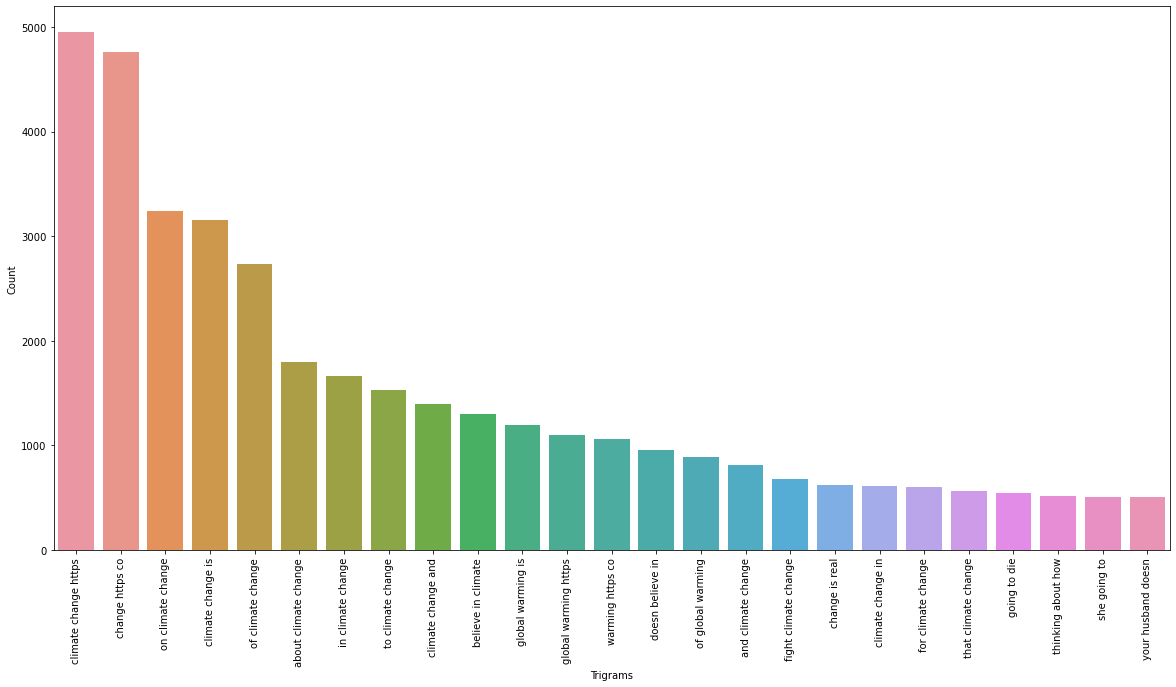

In [16]:
top_n_trigrams=get_top_ngram(tsa['message'],3)[:25]
print(top_n_trigrams)
x,y=map(list,zip(*top_n_trigrams)) 
fig = plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
plt.xlabel("Trigrams")
plt.ylabel("Count")
sns.barplot(x = x, y = y)
fig.savefig("freq-trigrams-barplot.png", bbox_inches = "tight")

### TOPIC MODELLING WITH pyLDAvis

In [17]:
import nltk
import gensim
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import punkt
from nltk import wordnet
# nltk.download('punkt')
# nltk.download('wordnet')

In [18]:
def preprocess_tweets(df):
    corpus = []
    stem = PorterStemmer()
    lem = wordnet.WordNetLemmatizer()
    for tweet in df['message']:
        words = [w for w in word_tokenize(tweet) if ((w.lower() not in stop) and username_filter(w))]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

corpus = preprocess_tweets(tsa)
# corpus

In [19]:
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [20]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 4, id2word = dic, passes = 10, workers = 2)
lda_model.show_topics()

[(0,
  '0.068*"global" + 0.067*"warming" + 0.032*"http" + 0.011*"..." + 0.006*"n\'t" + 0.006*"real" + 0.005*"Global" + 0.004*"like" + 0.004*"weather" + 0.003*"think"'),
 (1,
  '0.065*"http" + 0.063*"change" + 0.061*"climate" + 0.019*"Climate" + 0.012*"Change" + 0.006*"amp" + 0.005*"via" + 0.004*"Global" + 0.003*"..." + 0.003*"Warming"'),
 (2,
  '0.074*"change" + 0.074*"climate" + 0.050*"http" + 0.011*"n\'t" + 0.009*"Trump" + 0.007*"believe" + 0.005*"say" + 0.005*"going" + 0.004*"world" + 0.004*"people"'),
 (3,
  '0.054*"http" + 0.052*"change" + 0.052*"climate" + 0.014*"Trump" + 0.008*"EPA" + 0.004*"say" + 0.004*"Pruitt" + 0.003*"Scott" + 0.003*"Obama" + 0.003*"Donald"')]

### VISUALIZING RESULTS OF LDA

In [21]:
# import pyldavis

### WORDCLOUD

In [22]:
from wordcloud import WordCloud, STOPWORDS

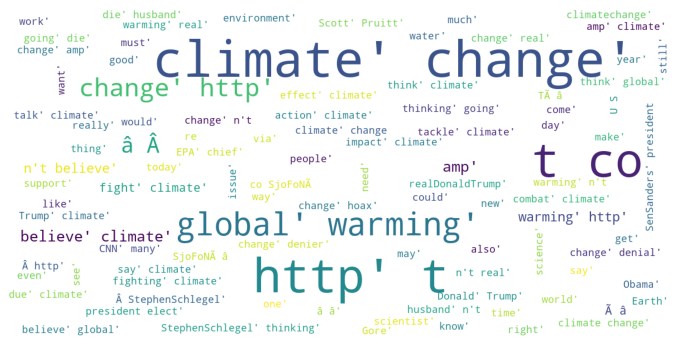

In [23]:
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)